In [ ]:
#Calulate the dwell time at Parkstreet

In [18]:
import pandas as pd
import numpy as np
import os
import json
import operator
from pandas.io.json import json_normalize
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
#%matplotlib inline

In [3]:
# function to convert epoch time to normal date_time
def epoch_to_date(epoch_time):
    epoch_time = float(epoch_time)
    normal_time = datetime.datetime.fromtimestamp(epoch_time) # 1973-11-29 22:33:09
    return normal_time

In [1]:
parser = argparse.ArgumentParser(description='Process some characters.')
parser.add_argument("tag",help="ENTER THE DATE IN 'yyyy-MM-dd' format: ")
args = parser.parse_args()
date_dwell = args.tag

NameError: name 'argparse' is not defined

In [5]:
file_name = "dwelltime_"+date_dwell+".json"
#file_dwell
json_files = [f_json for f_json in os.listdir("data//Dwelltime") if f_json == file_name]
if json_files:
    with open("data//Dwelltime//"+json_files[0],'r') as data_file:
        file_dwell = json.load(data_file)
        data_file.close()

In [6]:
#Pre-exploration of data

#Converting json into dataframes
dwell_time = json_normalize(file_dwell['dwell_times'])

#Changing data types
dwell_time['arr_dt'] = dwell_time['arr_dt'].apply(epoch_to_date)
dwell_time['dwell_time_sec'] = dwell_time['dwell_time_sec'].apply(lambda x : int(x))

In [7]:
#Replace outliers with the mean
dwell_time['dwell_time_sec'][((dwell_time['dwell_time_sec']-dwell_time['dwell_time_sec'].mean()).abs()>1.5*dwell_time['dwell_time_sec'].std())] = dwell_time['dwell_time_sec'].median() 

C:\Users\amuly\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
#Convert into timeseries format
ts_dwell_time = pd.DataFrame(dwell_time, columns = ['arr_dt', 'dwell_time_sec'])
ts_dwell_time['arr_dt'] = pd.to_datetime(ts_dwell_time['arr_dt'],format='%Y-%m-%d %H:%M:%S')
ts_dwell_time.index = ts_dwell_time['arr_dt']
del ts_dwell_time['arr_dt']

In [17]:
#Select only the specified date
ts_dwell_time = ts_dwell_time[date_dwell]
if not os.path.exists('Analysis_2') :
    os.mkdir('Analysis_2', 755 )
ts_dwell_time.to_csv("Analysis_2//Analysis_2.csv")

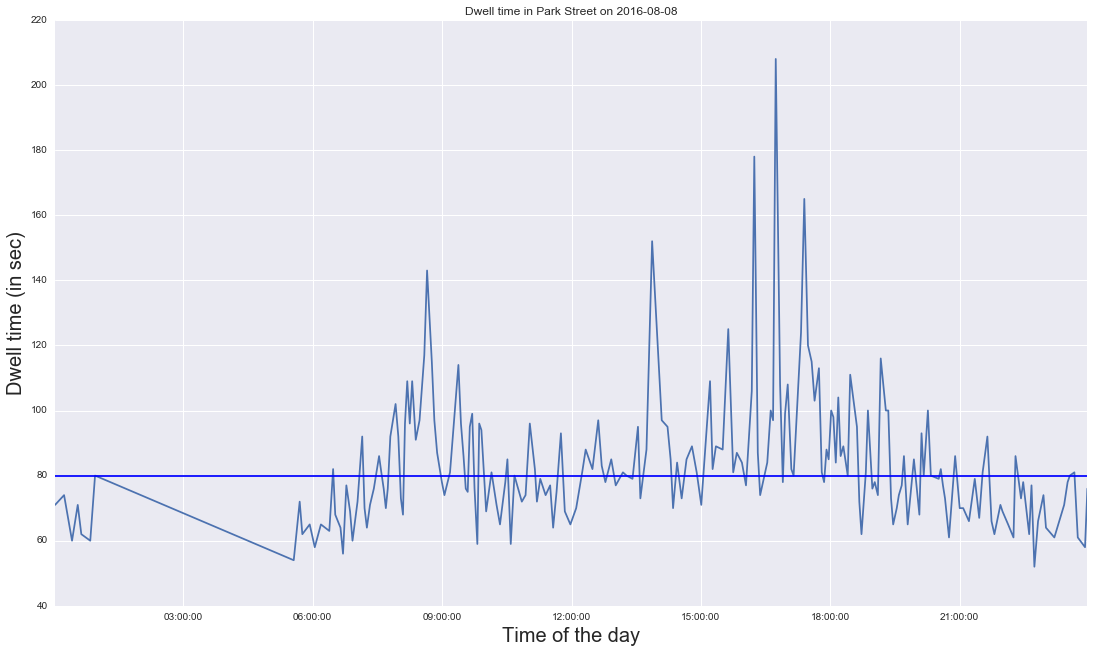

In [16]:
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(ts_dwell_time)
ax.set_title('Dwell time in Park Street on '+ date_dwell)
ax.set_xlabel('Time of the day',fontsize=20)
ax.set_ylabel('Dwell time (in sec)',fontsize=20)
plt.xticks(fontsize = 10)
ax.axhline(dwell_time['dwell_time_sec'].median())
fig.set_size_inches(18.5, 10.5)
fig.savefig('Analysis_2//Analysis_2.jpg', dpi=100)